# **Assignment 03 - Clustering**

### **Perform hierarchical clustering on the Play data and and the data generated with the help of two equations of concentric circles, adding some random noise. Apply various distance measures, including single, multiple, and average linkages, and ward.**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

playDataset = pd.read_excel("play.xlsx")
print(playDataset)

     Outlook  Temperature  Humidity   Windy   Decision
0   overcast           72        90  strong       play
1   overcast           83        78    weak       play
2   overcast           64        65  strong       play
3   overcast           81        75    weak       play
4      sunny           75        70  strong       play
5      sunny           80        90  strong  dont_play
6      sunny           85        85    weak  dont_play
7      sunny           72        95    weak  dont_play
8      sunny           69        70    weak       play
9       rain           71        80  strong  dont_play
10      rain           65        70  strong  dont_play
11      rain           75        80    weak       play
12      rain           68        80    weak       play
13      rain           70        96    weak       play


In [23]:
playDataset["Decision"] = playDataset["Decision"].replace(["play", "dont_play"],[1,0])
playDataset = pd.get_dummies(playDataset, columns = ["Outlook", "Windy"])
print(playDataset)

    Temperature  Humidity  Decision  Outlook_overcast  Outlook_rain  \
0            72        90         1                 1             0   
1            83        78         1                 1             0   
2            64        65         1                 1             0   
3            81        75         1                 1             0   
4            75        70         1                 0             0   
5            80        90         0                 0             0   
6            85        85         0                 0             0   
7            72        95         0                 0             0   
8            69        70         1                 0             0   
9            71        80         0                 0             1   
10           65        70         0                 0             1   
11           75        80         1                 0             1   
12           68        80         1                 0             1   
13    

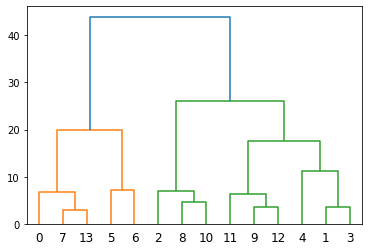


[[0 1 1 1 1 0 0 0 1 1 1 1 1 0]]


In [24]:
linkage_data = linkage(playDataset, method="ward", metric="euclidean")
dendrogram(linkage_data)
plt.show()
print("")
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(linkage_data, n_clusters = 2).T)

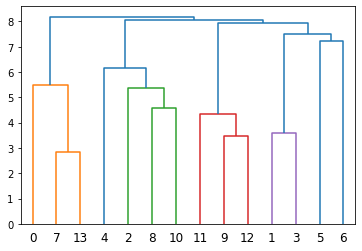


[[0 1 1 1 1 1 1 0 1 1 1 1 1 0]]


In [25]:
linkage_data = linkage(playDataset, method="single", metric="euclidean")
dendrogram(linkage_data)
plt.show()
print("")
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(linkage_data, n_clusters = 2).T)

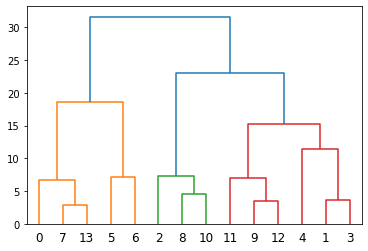


[[0 1 1 1 1 0 0 0 1 1 1 1 1 0]]


In [26]:
linkage_data = linkage(playDataset, method="complete", metric="euclidean")
dendrogram(linkage_data)
plt.show()
print("")
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(linkage_data, n_clusters = 2).T)

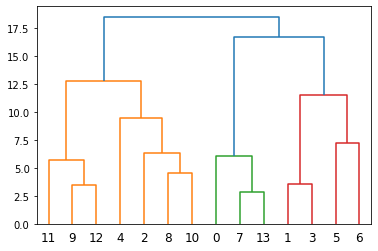


[[0 0 1 0 1 0 0 0 1 1 1 1 1 0]]


In [27]:
linkage_data = linkage(playDataset, method="average", metric="euclidean")
dendrogram(linkage_data)
plt.show()
print("")
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(linkage_data, n_clusters = 2).T)

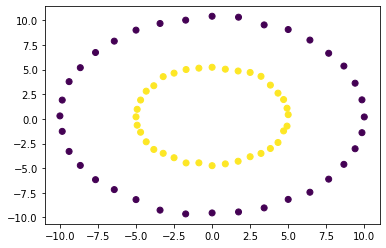

In [34]:
import random
import math 
x1_list = []
y1_list = []
x2_list = []
y2_list = []
for i in range (0,360,10):
  theta = i * math.pi / 180
  r1 = 5
  r2 = 10
  x1 = r1 * math.cos(theta)
  y1 = r1 * math.sin(theta) + random.uniform(0.1, 0.5)
  x2 = r2 * math.cos(theta)
  y2 = r2 * math.sin(theta) + random.uniform(0.1, 0.5)
  x1_list.append(x1)
  x2_list.append(x2)
  y1_list.append(y1)
  y2_list.append(y2)
x1_list = x1_list + x2_list
y1_list = y1_list + y2_list

data= pd.DataFrame(x1_list, columns =['X'])
data['Y'] = y1_list

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.show()


### **Perform k-Means clustering on the Play data and also Boston housing data and arrive at an optimal number of clusters via the elbow method.**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
playDataset = pd.read_excel("play.xlsx")
print(playDataset)

     Outlook  Temperature  Humidity   Windy   Decision
0   overcast           72        90  strong       play
1   overcast           83        78    weak       play
2   overcast           64        65  strong       play
3   overcast           81        75    weak       play
4      sunny           75        70  strong       play
5      sunny           80        90  strong  dont_play
6      sunny           85        85    weak  dont_play
7      sunny           72        95    weak  dont_play
8      sunny           69        70    weak       play
9       rain           71        80  strong  dont_play
10      rain           65        70  strong  dont_play
11      rain           75        80    weak       play
12      rain           68        80    weak       play
13      rain           70        96    weak       play


In [36]:
playDataset["Decision"] = playDataset["Decision"].replace(["play", "dont_play"],[1,0])
playDataset = pd.get_dummies(playDataset, columns = ["Outlook", "Windy"])
print(playDataset)

    Temperature  Humidity  Decision  Outlook_overcast  Outlook_rain  \
0            72        90         1                 1             0   
1            83        78         1                 1             0   
2            64        65         1                 1             0   
3            81        75         1                 1             0   
4            75        70         1                 0             0   
5            80        90         0                 0             0   
6            85        85         0                 0             0   
7            72        95         0                 0             0   
8            69        70         1                 0             0   
9            71        80         0                 0             1   
10           65        70         0                 0             1   
11           75        80         1                 0             1   
12           68        80         1                 0             1   
13    

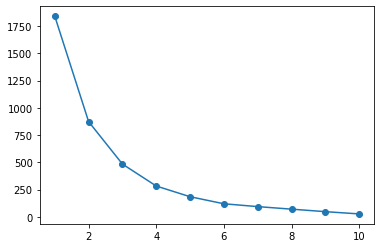

In [37]:
data = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(playDataset)
    data.append(kmeans.inertia_)
plt.plot(range(1,11), data, marker="o")
plt.show()

### **Optimal number of clusters via the elbow method for play data is: 2**

In [38]:
! pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
housingDataset = pd.read_excel("boston housing.xls")
print(housingDataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.099998  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.699997  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.300003  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.800003  2.5050    1  273   

            PT           B  LSTAT         MV  
0    15.300000  

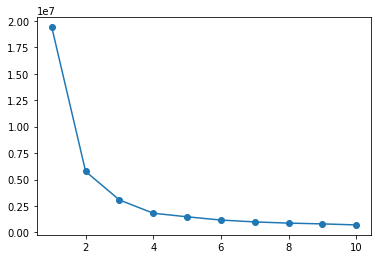

In [39]:
data = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(housingDataset)
    data.append(kmeans.inertia_)
plt.plot(range(1,11), data, marker="o")
plt.show()

### **Optimal number of clusters via the elbow method for boston housing data is: 2**